<a href="https://colab.research.google.com/github/KaissonFerreira/Diagrama_ELV_Pxy/blob/main/Notebook/Diagrama_Pxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projetando o diagrama Pxy para equílibrio Líquido-vapor de compostos binários.


---
Problema: Desenvolver um programa que construa um diagrama Pxy a partir de um banco de dados, para quando o usuário inserir os nomes das substâncias, as informações de cada uma delas sejam retiradas diretamente desse banco.


### Importando bibliotecas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Extração e tratamento dos dados

Leitura do banco de dados e transformação da primeira coluna em uma lista:

In [4]:
df=pd.read_excel('https://github.com/KaissonFerreira/Diagrama_ELV_Pxy/blob/main/C%C3%B3pia%20de%20dataset.xlsx?raw=true')
df=df.drop('Fórmula', axis= 'columns') # Exclusão da coluna 'Fórmula' por que não é preciso.
composto=list(df['Composto']) # Transformando a coluna 'Composto em uma lista.
composto

['Acetona',
 'Ácido acético',
 'Água',
 'Anilina',
 'Benzeno',
 'i-Butano',
 'n-Butano',
 'Estireno',
 'Etanol',
 'Éter dietílico',
 'Etilbenzeno',
 'Etilenoglicol',
 'n-Heptano',
 'n-Hexano',
 'n-Octano',
 'i-Pentano',
 'n-Pentano',
 'Tolueno',
 'o-Xileno',
 'm-Xileno',
 'p-Xileno']

### Criação de array e das funções

Criando uma array para composição em x, e inserindo funções de input para que o usuário possa dizer qual substância ele quer plotar:

In [5]:
xx = np.arange(0,1.1,0.1)
prop_valor= float(input('Digite o valor da temperatura em °C: '))
NC = 2
print('\n\nPara a construção do diagrama Pxy de um composto binário insira os nomes das substâncias: ')
subst_1 = str(input('\nInsira o nome da substância 1: '))
subst_2 = str(input('\nInsira o nome da substância 2: '))


Digite o valor da temperatura em °C: 70


Para a construção do diagrama Pxy de um composto binário insira os nomes das substâncias: 

Insira o nome da substância 1: Água

Insira o nome da substância 2: Benzeno


Aplicando o método for e o condicional if para encontrar a linha exata que está o composto inserido pelo usuário, e em seguida, indexando os respectivos valores para uma variável separadamente.

In [11]:

for i in range(0,21,1):
  if composto[i] == subst_1:
    break

a_1 = float(df.loc[df.index[i],['A']])
b_1=float(df.loc[df.index[i],['B']])
c_1=float(df.loc[df.index[i],['C']])


In [7]:

for i in range(0,21,1):
  if composto[i] == subst_2:
    break
a_2 = float(df.loc[df.index[i],['A']])
b_2=float(df.loc[df.index[i],['B']])
c_2=float(df.loc[df.index[i],['C']])


Criando as variáveis que receberão os dados coletados e dimensionados de forma de array para os devidos cálculos:

In [12]:

A = np.array([a_1,a_2])
B= np.array([b_1,b_2])
C= np.array([c_1,c_2])
psat = np.zeros((NC))
x = np.zeros((NC))
p = np.zeros(xx.size)
y = np.zeros((xx.size,NC))

Utilizando o método For para calcular a pressão de saturação para cada substância, além de calcular a pressão total do sistema para cada composição e também a fração molar em vapor para a respectiva pressão:

In [13]:
for i in range(NC):
    psat[i]=np.exp(A[i]-B[i]/(prop_valor+C[i]))
psat=psat*0.00133



In [14]:
i=0
for x1 in xx:
    x=np.array([x1,1-x1])
    p[i]=np.sum(np.dot(x,psat))
    for j in range(NC):
        y[i,j]=x[j]*psat[j]/p[i]
    i += 1


### Criação do diagrama Pxy:

Por fim, os códigos que serão usados da biblioteca Matplotlib para a construção do diagrama Pxy:

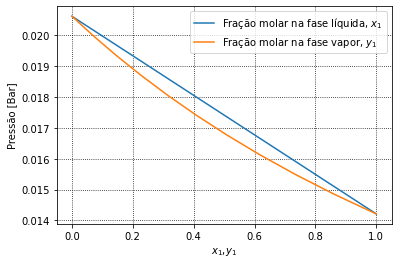

In [15]:
plt.plot(xx,p,label='Fração molar na fase líquida, $x_1$')
plt.plot(y[:,0],p,label='Fração molar na fase vapor, $y_1$') 
plt.legend(loc='best')
plt.xlabel('$x_1$,$y_1$')
plt.ylabel('Pressão [Bar]')
plt.grid(color='k',linestyle=':')
plt.show()